# Author: Na Qian
# Purpose: Logistic Regression Predict Attritation


# Import all libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
import warnings


# Acquire the data

In [2]:
attrition_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT3tRWud15OdI7F54MMrRX3kFDp7eUoGPhgHQyOyPBDv7opcWT_YBGAXo6yA7bFrici-r3HIW6eTTdh/pub?gid=1961589212&single=true&output=csv')
attrition_df.head(3)

,employee_satisfaction,last_performance_rating,workload,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5_years,dept,salary
0,0.82,0.97,3,244,5,0,0,0,SALES,MEDIUM
1,0.75,0.81,2,247,4,0,0,0,HR,SMALL
2,0.54,0.81,4,257,2,0,0,0,ADMIN,SMALL


In [3]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_satisfaction    11249 non-null  float64
 1   last_performance_rating  11249 non-null  float64
 2   workload                 11249 non-null  int64  
 3   avg_montly_hours         11249 non-null  int64  
 4   tenure_years             11249 non-null  int64  
 5   ergo_issues              11249 non-null  int64  
 6   attrit                   11249 non-null  int64  
 7   promo_in_last_5_years    11249 non-null  int64  
 8   dept                     11249 non-null  object 
 9   salary                   11249 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 879.0+ KB


# Describe categorical variables

In [4]:
attrition_df.dept.value_counts()

SALES    3098
TECH     2067
ADMIN    1674
IS        911
PM        682
MKT       637
FIN       579
RTD       571
HR        555
EXEC      475
Name: dept, dtype: int64

In [5]:
attrition_df.salary.value_counts()

SMALL     5445
MEDIUM    4845
LARGE      959
Name: salary, dtype: int64

In [6]:
attrition_df.ergo_issues.value_counts()

0    9618
1    1631
Name: ergo_issues, dtype: int64

In [7]:
attrition_df.attrit.value_counts()

0    8554
1    2695
Name: attrit, dtype: int64

# Describe numercial variables

In [8]:
attrition_df.describe()

,employee_satisfaction,last_performance_rating,workload,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5_years
count,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000
mean,0.612957,0.716225,3.799716,201.176727,3.499600,0.144991,0.239577,0.021869
std,0.248235,0.171378,1.232190,50.058105,1.469892,0.352107,0.426844,0.146261
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Graph plot

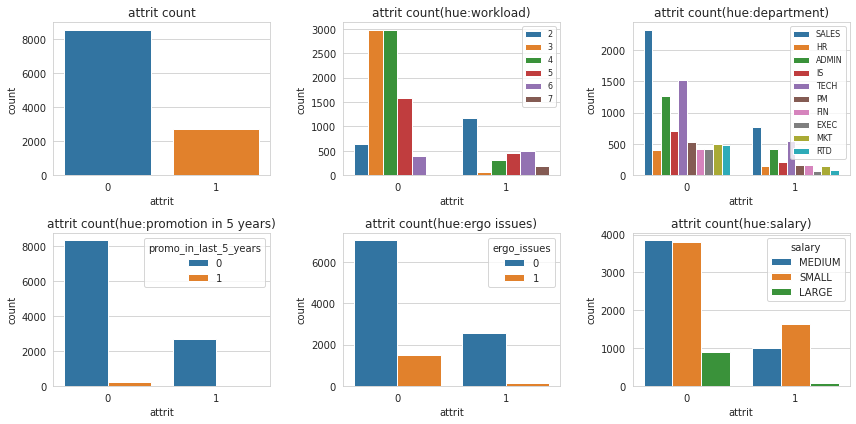

In [408]:
#use plot to visulize the factors that effect on attrit
rcParams['figure.figsize'] = (12,6)
plt.subplot(2,3,1)
sns.countplot(x='attrit',data=attrition_df)
plt.title('attrit count')
plt.subplot(2,3,2)
sns.countplot(x='attrit',hue = 'workload', data=attrition_df)
plt.title('attrit count(hue:workload)')
plt.legend(loc='best',prop={'size': 8})
plt.subplot(2,3,3)
sns.countplot(attrition_df['attrit'],hue=attrition_df['dept'])
plt.title('attrit count(hue:department)')
plt.legend(loc='best',prop={'size': 8})
plt.subplot(2,3,4)
sns.countplot(x='attrit',hue = 'promo_in_last_5_years', data=attrition_df)
plt.title('attrit count(hue:promotion in 5 years)')
plt.subplot(2,3,5)
sns.countplot(x='attrit',hue = 'ergo_issues', data=attrition_df)
plt.title('attrit count(hue:ergo issues)')
plt.subplot(2,3,6)
sns.countplot(x='attrit',hue = 'salary', data=attrition_df)
plt.title('attrit count(hue:salary)')
plt.tight_layout()

Some information can be interpreted from above graphs:
1. lowest workload(1)and highest workload(7) cause attrition obviously.
2. Employees who did not get promotion in last five years tend to quit their current job.
3. Employees whose salary was low tend to quit their current job.
4. Different departments did not have significant influence on attrition. In this case, I will drop this column when performing Logistic Regression.

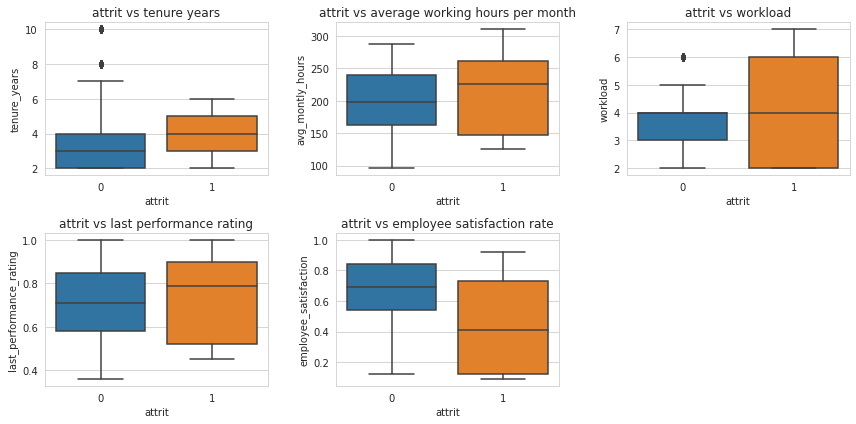

In [409]:
#use boxplot to visulize the factors that effect on attrit
plt.subplot(2,3,1)
sns.boxplot(x='attrit',y='tenure_years',data=attrition_df)
plt.title('attrit vs tenure years')
plt.subplot(2,3,2)
sns.boxplot(x='attrit',y='avg_montly_hours',data=attrition_df)
plt.title('attrit vs average working hours per month')
plt.subplot(2,3,3)
sns.boxplot(x='attrit',y='workload',data=attrition_df)
plt.title('attrit vs workload')
plt.subplot(2,3,4)
sns.boxplot(x='attrit',y='last_performance_rating',data=attrition_df)
plt.title('attrit vs last performance rating')
plt.subplot(2,3,5)
sns.boxplot(x='attrit',y='employee_satisfaction',data=attrition_df)
plt.title('attrit vs employee satisfaction rate')

plt.tight_layout()

Some information can be interpreted from above graphs:

1.Employees who work for the company for longer years tend to quit their current job.

2.Employees who have low satisfaction rate tend to quit their current job.

3.Employees whose last performance rating was very low or very high tend to quit thier current job.

4.The extremely low or extremely high average working hours causes the rise of attrition.

# Logistic Regression

In [9]:
#convert 'salary' to dummy
sal = pd.get_dummies(attrition_df['salary'],drop_first=True)

In [10]:
attrition_df = pd.concat([attrition_df,sal],axis=1)

In [11]:
#drop unnessary columns
attrition_df.drop(['salary','dept'],axis=1,inplace=True)

In [12]:
X=attrition_df.drop(['attrit'],axis=1)
y=attrition_df['attrit']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101)

In [14]:
logmodel=LogisticRegression(max_iter=200)

In [16]:
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
logmodel.score(X_test, y_test)

0.7987913259864913

In [18]:
#use logistic regression make prediction
predictions=logmodel.predict(X_test)

In [27]:
prediction_df = pd.DataFrame(logmodel.predict(X_test),X_test.index, columns = ['Prediction'])
probability_df = pd.DataFrame(logmodel.predict_proba(X_test), X_test.index)
all_together_df=pd.concat([X_test,y_test,prediction_df,probability_df],axis=1)
all_together_df

,employee_satisfaction,last_performance_rating,workload,avg_montly_hours,tenure_years,ergo_issues,promo_in_last_5_years,MEDIUM,SMALL,attrit,Prediction,0,1
5559,0.44,0.55,2,156,3,0,0,1,0,1,0,0.641324,0.358676
10877,0.56,0.66,3,139,2,0,0,0,1,0,0,0.752520,0.247480
9344,0.11,0.92,6,305,4,0,0,0,1,1,1,0.247163,0.752837
3902,0.85,0.59,2,264,2,0,0,0,1,0,0,0.835304,0.164696
5886,0.85,0.89,4,177,3,0,0,1,0,0,0,0.928650,0.071350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,0.19,0.80,6,157,6,1,0,0,1,0,0,0.684986,0.315014
3501,0.82,0.89,4,239,2,0,0,1,0,0,0,0.921461,0.078539
1489,0.94,0.70,3,176,3,0,0,0,1,0,0,0.907907,0.092093
6364,0.82,0.56,2,227,5,1,0,0,0,0,0,0.984190,0.015810


# Arbitrary values prediction

In [28]:
#make arbitrary variables
arbitrary_values = pd.DataFrame(data = {'employee_satisfaction': [0.91,0.95,0.3,0.2,0.92],'last_performance_rating':[0.5,0.9,0.9,0.2,0.6],'workload':[3,5,4,3,4],'avg_montly_hours':[150,200,230,220,170],'tenure_years':[1,3,4,5,6],'ergo_issues':[1,1,0,0,1],'promo_in_last_5_years':[1,1,0,0,1],'MEDIUM':[0,0,0,0,1],'SMALL':[0,1,1,1,0]})

In [29]:
arbitrary_values

,employee_satisfaction,last_performance_rating,workload,avg_montly_hours,tenure_years,ergo_issues,promo_in_last_5_years,MEDIUM,SMALL
0,0.91,0.5,3,150,1,1,1,0,0
1,0.95,0.9,5,200,3,1,1,0,1
2,0.30,0.9,4,230,4,0,0,0,1
3,0.20,0.2,3,220,5,0,0,0,1
4,0.92,0.6,4,170,6,1,1,1,0


In [30]:
#make prediction
pd.DataFrame(logmodel.predict(arbitrary_values),columns=['predictions'])

,predictions
0,0
1,0
2,1
3,1
4,0


In [31]:
# make dataframe to show the predictions and probabilities
arbitrary_values_pred=pd.DataFrame(logmodel.predict(arbitrary_values),columns=['prediction'])
arbitrary_values_pred_prob=pd.DataFrame(logmodel.predict_proba(arbitrary_values))
arbitrary_values_pred_alltogether = pd.concat([arbitrary_values,arbitrary_values_pred_prob,arbitrary_values_pred],axis=1)
arbitrary_values_pred_alltogether

,employee_satisfaction,last_performance_rating,workload,avg_montly_hours,tenure_years,ergo_issues,promo_in_last_5_years,MEDIUM,SMALL,0,1,prediction
0,0.91,0.5,3,150,1,1,1,0,0,0.999293,0.000707,0
1,0.95,0.9,5,200,3,1,1,0,1,0.995121,0.004879,0
2,0.30,0.9,4,230,4,0,0,0,1,0.346709,0.653291,1
3,0.20,0.2,3,220,5,0,0,0,1,0.252948,0.747052,1
4,0.92,0.6,4,170,6,1,1,1,0,0.993114,0.006886,0


# Logistic Regression model evaluate

In [32]:
#make confusion matrix
con_mat = confusion_matrix(y_test,predictions)

In [33]:
con_mat

array([[1998,  147],
       [ 419,  249]])

Text(0.5, 16.0, 'Predicted label')

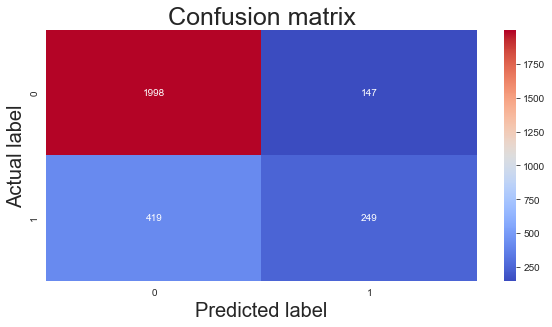

In [34]:
#Visualizing Confusion Matrix using Heatmap
rcParams['figure.figsize'] = (8,4)
sns.heatmap(pd.DataFrame(con_mat), annot=True, cmap="coolwarm",fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

In [35]:
#make classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2145
           1       0.63      0.37      0.47       668

    accuracy                           0.80      2813
   macro avg       0.73      0.65      0.67      2813
weighted avg       0.78      0.80      0.78      2813



# Conclusion

 causes for attrition:

*   Low satisfaction rate

*   Very low workload or high workload
*   No promotation in last 5 years


*   low salary

*   work for the company for longer years
*   Very high or low last performance rating

*   Very high or low average working hours per month

Logistic Regression model evaluate



*   The logsitic regression model accuracy was 0.8




*   The model had a good performance on predicting no attrit, the precision was 0.83, the recall was 0.93, the f1-score was 0.88.

*   The model made many type II errors. The prediction on attrit has precision 0.63, recall 0.37, f1-score 0.47









